In [2]:
import os
import pandas as pd
import torch
import torchvision.transforms as op
import matplotlib.pyplot as plt
from torch.utils.data import random_split, Dataset
from PIL import Image

In [3]:
class GalaxyJungle(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return (self.img_labels).shape[0]

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(self.img_labels.iloc[idx, 0])) + '.jpg'
        image = Image.open(img_path)
        label = self.img_labels.iloc[idx, 1:]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label, self.img_labels.iloc[idx, 0]

In [ ]:
transfs = op.ToTensor()
DS = GalaxyJungle('../data/training/training_solutions_rev1.csv', '../data/training/', transfs)

tensor([[[0.0118, 0.0275, 0.0392,  ..., 0.0314, 0.0392, 0.0431],
         [0.0157, 0.0314, 0.0392,  ..., 0.0275, 0.0353, 0.0392],
         [0.0196, 0.0314, 0.0392,  ..., 0.0235, 0.0275, 0.0353],
         ...,
         [0.0235, 0.0353, 0.0471,  ..., 0.6196, 0.6235, 0.6157],
         [0.0118, 0.0196, 0.0314,  ..., 0.6235, 0.6118, 0.6039],
         [0.0000, 0.0039, 0.0196,  ..., 0.6314, 0.6157, 0.6039]],

        [[0.0196, 0.0353, 0.0471,  ..., 0.0314, 0.0392, 0.0431],
         [0.0235, 0.0392, 0.0471,  ..., 0.0275, 0.0353, 0.0392],
         [0.0275, 0.0392, 0.0471,  ..., 0.0235, 0.0275, 0.0353],
         ...,
         [0.0235, 0.0353, 0.0471,  ..., 0.4275, 0.4392, 0.4471],
         [0.0118, 0.0196, 0.0314,  ..., 0.4039, 0.4078, 0.4078],
         [0.0000, 0.0039, 0.0196,  ..., 0.3922, 0.3922, 0.3882]],

        [[0.0078, 0.0235, 0.0353,  ..., 0.0235, 0.0314, 0.0353],
         [0.0118, 0.0275, 0.0353,  ..., 0.0196, 0.0275, 0.0314],
         [0.0157, 0.0275, 0.0353,  ..., 0.0157, 0.0196, 0.

Class1.1     0.026522
Class1.2     0.864163
Class1.3     0.109315
Class2.1     0.000000
Class2.2     0.864163
Class3.1     0.190288
Class3.2     0.673875
Class4.1     0.798575
Class4.2     0.065588
Class5.1     0.000000
Class5.2     0.379614
Class5.3     0.453186
Class5.4     0.031362
Class6.1     0.138993
Class6.2     0.861007
Class7.1     0.026522
Class7.2     0.000000
Class7.3     0.000000
Class8.1     0.000000
Class8.2     0.000000
Class8.3     0.083396
Class8.4     0.000000
Class8.5     0.055597
Class8.6     0.000000
Class8.7     0.000000
Class9.1     0.000000
Class9.2     0.000000
Class9.3     0.000000
Class10.1    0.215931
Class10.2    0.553873
Class10.3    0.028769
Class11.1    0.000000
Class11.2    0.096679
Class11.3    0.490517
Class11.4    0.055708
Class11.5    0.000000
Class11.6    0.155673
Name: 234, dtype: float64

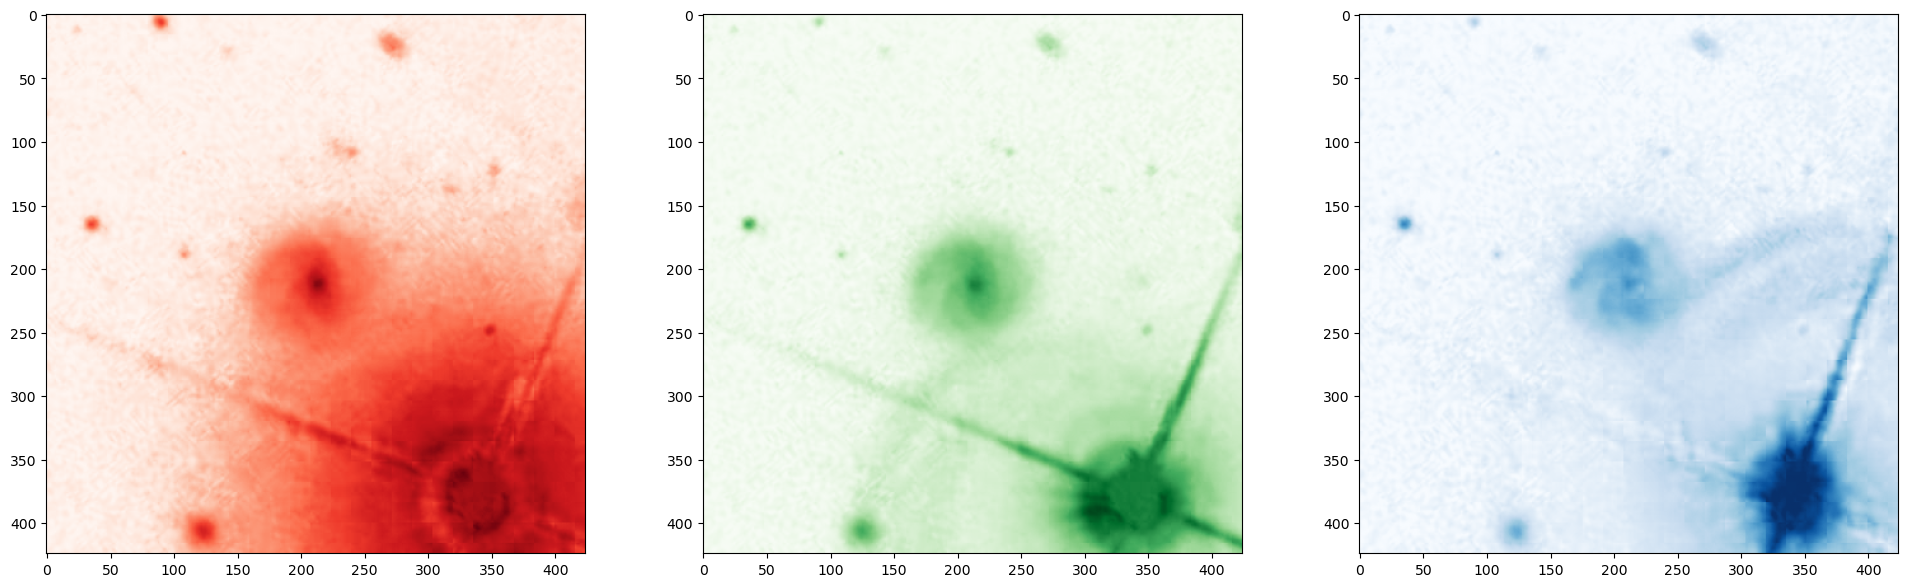

In [ ]:
img, lab, indx = DS.__getitem__(234)

fig, ax = plt.subplots(1,3, figsize=(24,7))
color = ['Reds', 'Greens', 'Blues']
for i,j in enumerate(img):
    ax[i].imshow(j, cmap=color[i])

In [ ]:
training, test = random_split(DS, [.8, .2])

NameError: name 'random_split' is not defined